In [7]:
import psycopg2
import matplotlib.pyplot as plt 
import seaborn as sns
import sqlalchemy
from sqlalchemy import create_engine
import schedule
from google.cloud.sql.connector import Connector
import pg8000.native
from sqlalchemy import text
import os
from dotenv import load_dotenv
import pandas as pd

In [2]:
connector = Connector()

# function to return the database connection
def getconn() -> pg8000.native.Connection:
    conn: pg8000.connections.Connection = connector.connect(
        os.environ.get("google_cloud_project"),
        "pg8000",
        user=os.environ.get("google_cloud_user"),
        password=os.environ.get("google_cloud_pass"),
        db="bicimad_worker"
    )
    return conn

# create connection pool
pool = sqlalchemy.create_engine(
    "postgresql+pg8000://",
    creator=getconn,
)

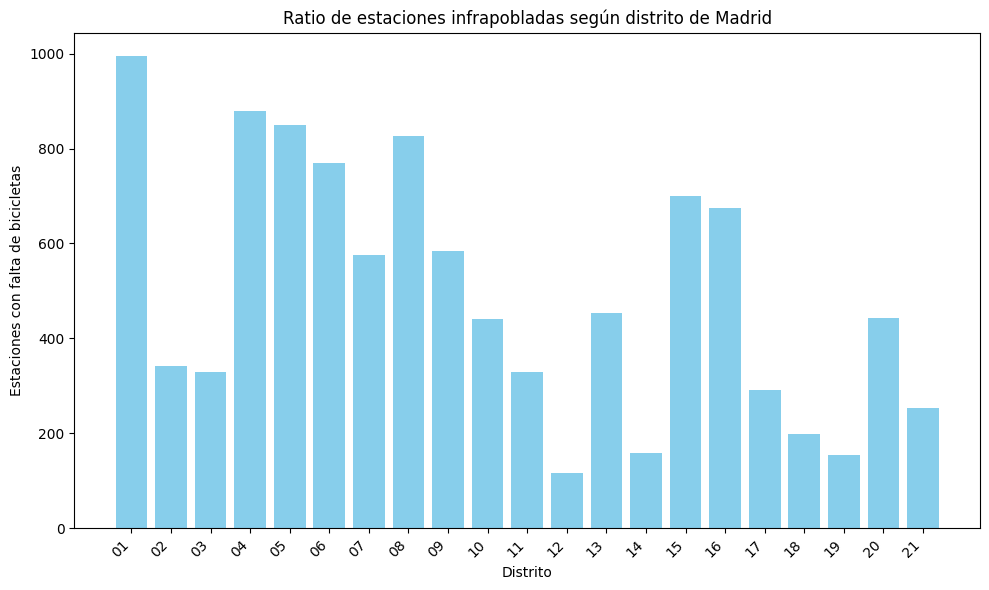

In [3]:
conn = pool.connect()
query_ratio_0 = """
    WITH TotalStations AS (
        SELECT e.code_district, COUNT(e.id) AS total_stations
        FROM disponibilidad d
        INNER JOIN estaciones e ON d.id = e.id
        GROUP BY e.code_district
)

SELECT e.code_district, 
       COUNT(e.id) AS count_light_0, 
       ts.total_stations,
       COUNT(e.id)::float / ts.total_stations AS ratio_light_0
FROM disponibilidad d
INNER JOIN estaciones e ON d.id = e.id
INNER JOIN TotalStations ts ON e.code_district = ts.code_district
WHERE d.light = '0'
GROUP BY e.code_district, ts.total_stations
ORDER BY e.code_district;"""

results = conn.execute(text(query_ratio_0)).fetchall()
conn.close()

districts = [result[0] for result in results]
light_counts = [result[1] for result in results]

plt.figure(figsize=(10, 6))
plt.bar(districts, light_counts, color='skyblue')
plt.xlabel('Distrito')
plt.ylabel('Estaciones con falta de bicicletas')
plt.title('Ratio de estaciones infrapobladas según distrito de Madrid')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

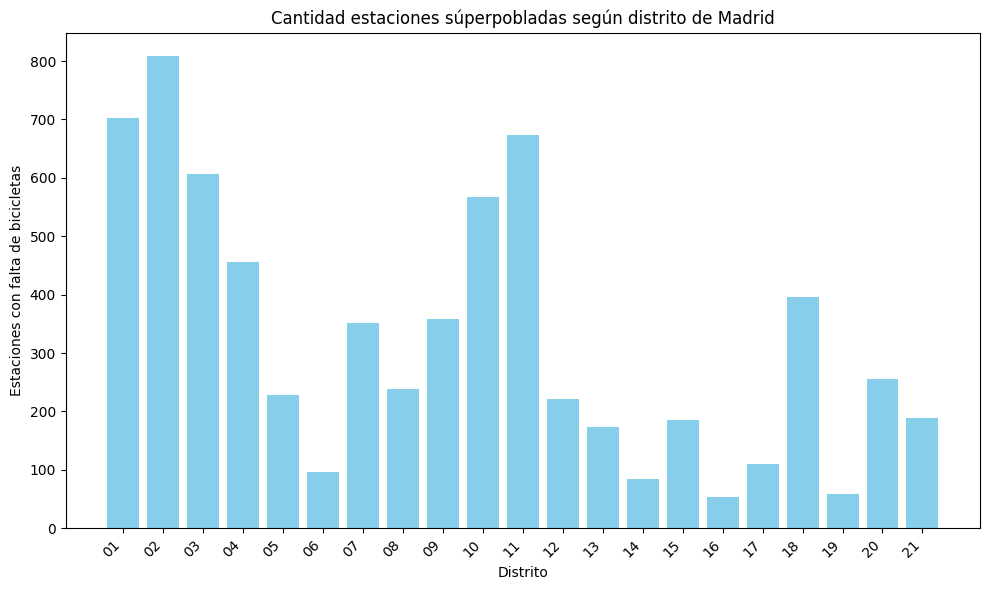

In [5]:
conn = pool.connect()
query_ratio_1 = """
    WITH TotalStations AS (
        SELECT e.code_district, COUNT(e.id) AS total_stations
        FROM disponibilidad d
        INNER JOIN estaciones e ON d.id = e.id
        GROUP BY e.code_district
)

SELECT e.code_district, 
       COUNT(e.id) AS count_light_1, 
       ts.total_stations,
       COUNT(e.id)::float / ts.total_stations AS ratio_light_1
FROM disponibilidad d
INNER JOIN estaciones e ON d.id = e.id
INNER JOIN TotalStations ts ON e.code_district = ts.code_district
WHERE d.light = '1'
GROUP BY e.code_district, ts.total_stations
ORDER BY e.code_district;"""

results = conn.execute(text(query_ratio_1)).fetchall()
conn.close()

districts = [result[0] for result in results]
light_counts = [result[1] for result in results]

plt.figure(figsize=(10, 6))
plt.bar(districts, light_counts, color='skyblue')
plt.xlabel('Distrito')
plt.ylabel('Estaciones con falta de bicicletas')
plt.title('Cantidad estaciones súperpobladas según distrito de Madrid')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

In [ ]:
query_metric_stations = """ 
    SELECT s.code_district, COUNT(*)
    FROM disponibilidad d
    INNER JOIN stations s ON d.id = s.id
    WHERE d.light = '0'
    GROUP BY s.code_district;
    """
conn.commit()
cur.execute(query_underpopulated)
results_underpopulated = cur.fetchall()
districts = [result[0] for result in results_underpopulated]
light_counts = [result[1] for result in results_underpopulated]

In [13]:
disponibilidad = pd.read_csv("../../../disponibilidad.csv")

In [14]:
disponibilidad

,Unnamed: 0,dock_bikes,free_bases,id,light,no_available,reservations_count,last_updated,activate
0,0,11,11,2365,2,0,0,2024-02-08 20:24:00,1.0
1,1,8,15,2366,2,0,0,2024-02-08 20:24:00,1.0
2,2,23,1,2362,1,0,0,2024-02-08 20:24:00,1.0
3,3,0,0,1404,3,1,0,2024-02-08 20:24:00,1.0
4,4,23,4,1406,1,0,0,2024-02-08 20:24:00,1.0
...,...,...,...,...,...,...,...,...,...
601702,601702,9,14,2305,2,0,0,2024-03-04 20:27:31,1.0
601703,601703,15,8,2127,2,0,0,2024-03-04 20:27:31,1.0
601704,601704,1,23,2164,0,0,0,2024-03-04 20:27:31,1.0
601705,601705,11,12,2015,2,0,0,2024-03-04 20:27:31,1.0


In [17]:
disponibilidad = disponibilidad[['activate', 'dock_bikes', 'free_bases', 'id', 'light', 'no_available', 'reservations_count', 'last_updated']]

disponibilidad.to_csv("../../../disponibilidad3.csv", index=False)